In [1]:
# Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt


from sklearn.neural_network import MLPRegressor # класс для обучения с помощью нейронной сети

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # методы оценки ошибки модели
from sklearn.model_selection import train_test_split # класс разбиения на данные для обучения и для проверки

# импортируем функции
from functions import generate_random_array, plot_true_vs_predicted



In [2]:
# Основная функция
def main_function (x, y, z):
    function = np.sin(x)*np.cos(2*x) + np.sin(y)*np.cos(2*y) + np.sin(z)*np.cos(2*z)
    return function

In [3]:
# генерим случайный массив признаков от -10 до +10
xyz = generate_random_array(5000, 3, -10, +10)

In [4]:
# Подставляем сгенерированный массив в функцию
results = main_function(*xyz.T)

In [5]:
for i in range (len(results)):
    if i <= 10:
        print(f'x = {xyz[i, 0]}, y = {xyz[i, 1]}, z = {xyz[i, 2]}, function = {results[i]}')
    else:
        break

x = 5.479120971119267, y = -1.2224312049589532, z = 7.171958398227648, function = 0.5883968847672894
x = 3.9473605811872776, y = -8.11645304224701, z = 9.512447032735118, function = 0.7788812149729805
x = 5.222794039807059, y = 5.721286105539075, z = -7.4377273464890825, function = 0.8413058896452736
x = -0.9922812420886569, y = -2.5840395153483753, z = 8.535299776972035, function = -0.056738815630564515
x = 2.8773024016132904, y = 6.455232265416598, z = -1.131716023453377, function = 0.964732475732968
x = -5.455225564304462, y = 1.0916957403166965, z = -8.723654877916493, function = -0.6810898082878277
x = 6.55262343985164, y = 2.6332879824412974, z = 5.1617548017074775, function = 1.0453850413021528
x = -2.9094806374026323, y = 9.413960487898066, z = 7.862422426443953, function = -1.1946959668433026
x = 5.567669941475238, y = -6.1072258429606485, z = -0.6655799254593155, function = -0.07363148923768356
x = -9.123924684255424, y = -6.914210158649043, z = 3.6609790648490925, function =

In [6]:
# разбиваем данные для данные для обучения и для проверки
X_train, X_test, y_train, y_test = train_test_split(xyz,results,test_size=0.1,random_state=42)

In [7]:
# Создаём нейросеть
mlp = MLPRegressor(
    hidden_layer_sizes=(8,),
    activation='tanh',  # возможные варианты ['relu', 'tanh', 'logistic', 'identity']
    solver='lbfgs', # возможные варианты ['adam', 'sgd', 'lbfgs', ]
    alpha=0.01,
    max_iter=10000,
    random_state=42
)



# наполняем модель
mlp.fit(X_train, y_train);
#print(f'Количество итераций: {len(mlp.validation_scores_)}, последний R² = {mlp.validation_scores_[-1]:2f}')  


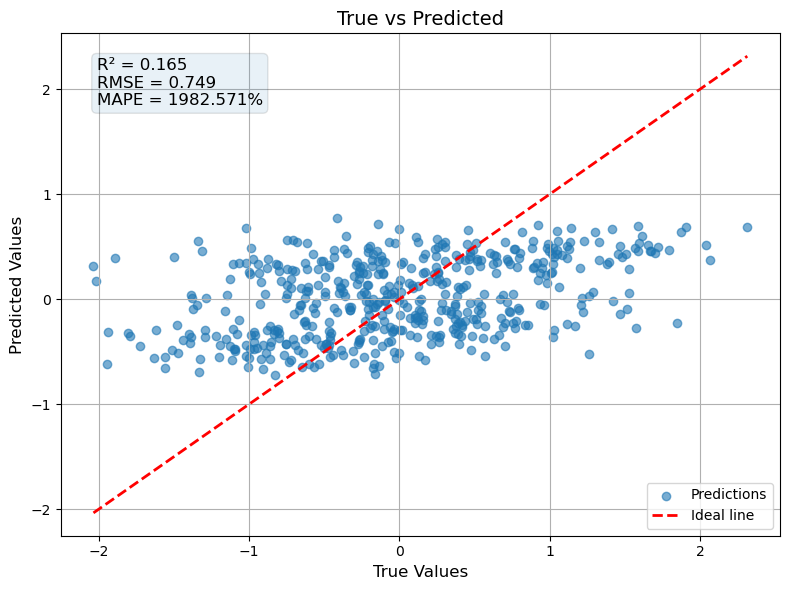

In [8]:
# Расчитываем отклик по данным для проверки
y_pred = mlp.predict(X_test)
# посмотрим на результат
plot_true_vs_predicted (y_test, y_pred)